# Business understanding

# Data understanding

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import scipy.stats as st
import seaborn as sns
import math
from alteredAwpyFunctions import *

In [4]:
#importing data
dir_path = "JSON"
games = []
for file in os.listdir(dir_path):
    if file.endswith(".json"):
        game = json.load(open(dir_path+"/"+file))
        games.append(game) 

# Data preperation
Omdat de data volledig klopt, zijn er geen stappen nodig om deze nog voor te bereiden voordat er verder mee wordt gewerkt.

# Modeling

In [ ]:
#generate list of unique maps in pool
maps = []
for game in games:
    if game['mapName'] not in maps:
        maps.append(game['mapName'])

#init dict's of maps
map_dict_mouz = {}
map_dict_enemy = {}
avg_kills_mouz = {}
avg_kills_enemy = {}
stdef_map_dict_mouz = {}
stdef_map_dict_enemy = {}
conf_rate_kills = {}
win_dict = {}
loss_dict = {}
kill_dif = {}
win_dif = {}
stdef_loss_dict = {}
stdef_win_dict = {}
conf_rate_wins = {}
kill_win_dict_mouz = {}
bomb_win_dict_mouz = {}
kill_win_dict_enemy = {}
bomb_win_dict_enemy = {}
i=0
for k in maps:
    map_dict_mouz[maps[i]] = []
    map_dict_enemy[maps[i]] = []
    avg_kills_mouz[maps[i]] = []
    avg_kills_enemy[maps[i]] = []
    stdef_map_dict_mouz[maps[i]] = []
    stdef_map_dict_enemy[maps[i]] = []
    conf_rate_kills[maps[i]] = []
    win_dict[maps[i]] = []
    loss_dict[maps[i]] = []
    kill_dif[maps[i]] = []
    win_dif[maps[i]] = []
    stdef_loss_dict[maps[i]] = []
    stdef_win_dict[maps[i]] = []
    conf_rate_wins[maps[i]] = []
    kill_win_dict_mouz[maps[i]] = 0
    bomb_win_dict_mouz[maps[i]] = 0
    kill_win_dict_enemy[maps[i]] = 0
    bomb_win_dict_enemy[maps[i]] = 0
    i += 1

## Welke map presteert het beste?

In [ ]:
#fill dict's with kills per round
for game in games:
    for gameround in game['gameRounds']:
        number_of_kills_mouz = 0
        number_of_kills_enemy = 0
        for kill in gameround['kills']:
            if kill['attackerTeam'] == "MOUZ":
                number_of_kills_mouz += 1
            if kill['attackerTeam'] != "MOUZ":
                number_of_kills_enemy += 1 
        map_dict_mouz[game['mapName']].append(number_of_kills_mouz) 
        map_dict_enemy[game['mapName']].append(number_of_kills_enemy)

    #get SD and n
i = 0
for k in map_dict_mouz:
    stdef_map_dict_mouz[maps[i]].append(np.mean(map_dict_mouz[maps[i]]))
    stdef_map_dict_mouz[maps[i]].append(np.std(map_dict_mouz[maps[i]]))
    stdef_map_dict_mouz[maps[i]].append(len(map_dict_mouz[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(np.mean(map_dict_enemy[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(np.std(map_dict_enemy[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(len(map_dict_enemy[maps[i]]))
    i+=1

#get SE(diff)
i = 0
for k in stdef_map_dict_mouz:
    conf_rate_kills[maps[i]].append(math.sqrt((pow(stdef_map_dict_mouz.get(maps[i])[1], 2)/ stdef_map_dict_mouz.get(maps[i])[2]) + (pow(stdef_map_dict_enemy.get(maps[i])[1], 2)/ stdef_map_dict_enemy.get(maps[i])[2])))
    conf_rate_kills[maps[i]].append(stdef_map_dict_mouz.get(maps[i])[0]-stdef_map_dict_enemy.get(maps[i])[0])
    conf_rate_kills[maps[i]].append(conf_rate_kills.get(maps[i])[1]-1.96*conf_rate_kills.get(maps[i])[0])
    conf_rate_kills[maps[i]].append(conf_rate_kills.get(maps[i])[1]+1.96*conf_rate_kills.get(maps[i])[0])
    i += 1
conf_rate_kills

#calculate 95% conf 
i = 0
conf_low = []
conf_high = []
for k in conf_rate_kills:
    conf_high.append(conf_rate_kills[maps[i]][3])
    conf_low.append(conf_rate_kills[maps[i]][2])
    i += 1

#make dict containing diff in kills and the conf rate to plot
i = 0
for k in stdef_map_dict_mouz:
    kill_dif[maps[i]].append(stdef_map_dict_mouz[k][0]-stdef_map_dict_enemy[k][0])
    kill_dif[maps[i]].append(conf_low[i]) 
    kill_dif[maps[i]].append(conf_high[i]) 
    i += 1
#sort on highest to lowest dif in kills
kill_dif = dict(sorted(kill_dif.items(), key=lambda x:x[1], reverse=True))

keys = list(kill_dif.keys())
values = list(kill_dif.values())
low = []
high = []
dif = []

i = 0
for k in values:
    dif.append(values[i][0]) 
    i+=1
i = 0
for k in values:
    low.append(values[i][1])
    i+= 1
i = 0
for k in values:
    high.append(values[i][2])
    i+= 1

#plot barplot 
ax = sns.barplot(x=keys, y=dif, palette="blend:#7AB,#EDA")
ax.set(xlabel='Map Name', ylabel='Kill difference', title='Kill difference per map')
ax
#plot errorbars
i = 0
for k in range(0, len(kill_dif)):
    plt.plot([i,i], [low[i], high[i]], color = 'grey')
    i += 1

In [ ]:
#fill dict's with mouz and enemy wins per map
for game in games:
    number_of_winns = 0
    number_of_losses = 0
    for gameround in game['gameRounds']:
        if gameround['winningTeam'] == "MOUZ":
            number_of_winns += 1
        else:
            number_of_losses += 1
         
    win_dict[game['mapName']].append(number_of_winns) 
    loss_dict[game['mapName']].append(number_of_losses)

#statistics
i = 0
for k in map_dict_mouz:
    stdef_win_dict[maps[i]].append(np.mean(win_dict[maps[i]]))
    stdef_win_dict[maps[i]].append(np.std(win_dict[maps[i]]))
    stdef_win_dict[maps[i]].append(len(win_dict[maps[i]]))
    stdef_loss_dict[maps[i]].append(np.mean(loss_dict[maps[i]]))
    stdef_loss_dict[maps[i]].append(np.std(loss_dict[maps[i]]))
    stdef_loss_dict[maps[i]].append(len(loss_dict[maps[i]]))
    i+=1

i = 0
for k in stdef_loss_dict:
    conf_rate_wins[maps[i]].append(math.sqrt((pow(stdef_win_dict.get(maps[i])[1], 2)/ stdef_win_dict.get(maps[i])[2]) + (pow(stdef_loss_dict.get(maps[i])[1], 2)/ stdef_loss_dict.get(maps[i])[2])))
    conf_rate_wins[maps[i]].append(stdef_win_dict.get(maps[i])[0]-stdef_loss_dict.get(maps[i])[0])
    conf_rate_wins[maps[i]].append(conf_rate_wins.get(maps[i])[1]-1.96*conf_rate_wins.get(maps[i])[0])
    conf_rate_wins[maps[i]].append(conf_rate_wins.get(maps[i])[1]+1.96*conf_rate_wins.get(maps[i])[0])
    i += 1

#calculate 95% conf 
i = 0
conf_low = []
conf_high = []
for k in conf_rate_kills:
    conf_high.append(conf_rate_wins[maps[i]][3])
    conf_low.append(conf_rate_wins[maps[i]][2])
    i += 1

#make dict containing diff in kills and the conf rate to plot
i = 0
for k in stdef_win_dict:
    win_dif[maps[i]].append(stdef_win_dict[k][0]-stdef_loss_dict[k][0])
    win_dif[maps[i]].append(conf_low[i]) 
    win_dif[maps[i]].append(conf_high[i]) 
    i += 1
#sort on highest to lowest dif in kills
win_dif = dict(sorted(win_dif.items(), key=lambda x:x[1], reverse=True))

keys = list(win_dif.keys())
values = list(win_dif.values())
low = []
high = []
dif = []

i = 0
for k in values:
    dif.append(values[i][0]) 
    i+=1
i = 0
for k in values:
    low.append(values[i][1])
    i+= 1
i = 0
for k in values:
    high.append(values[i][2])
    i+= 1

#plot barplot 
ax = sns.barplot(x=keys, y=dif, palette="blend:#7AB,#EDA")
ax.set(xlabel='Map Name', ylabel='Kill difference', title='Kill difference per map')
ax
#plot errorbars
i = 0
for k in range(0, len(win_dif)):
    plt.plot([i,i], [low[i], high[i]], color = 'grey')
    i += 1  

### Conclusie
Uit de data-analyse blijkt dat MOUZ het meest succesvol is op de map Vertigo en het minst succesvol is op de map Nuke. Het verschil in kills op de map Vertigo is ook het grootst in vergelijking met hun tegenstander. Echter, de beperkte sample size op de map Nuke maakt de data minder betrouwbaar. Ancient presteert het beste, rekening houdend met de sample size.

#### Discussie
Het is belangrijk om op te merken dat de gegevens afkomstig zijn van een enkel team (MOUZ), wat betekent dat de resultaten niet kunnen worden gegeneraliseerd naar andere teams. Bovendien is de sample size beperkt, wat de nauwkeurigheid van de gegevens kan beïnvloeden. Bij het analyseren van esports-gegevens is het daarom belangrijk om te zorgen voor een grote en diverse sample size, waarbij gegevens van verschillende teams worden meegenomen om de prestaties van MOUZ te kunnen vergelijken met die van andere teams. Door deze aanpak kunnen we betere conclusies trekken over de prestaties van MOUZ en de factoren die van invloed zijn op de esports-wedstrijden.

## Is er een verschil in ronde overwinningen tussen CT en T?

In [ ]:
stages = {"challenger_stage" : [], 
          "legends_stage" : [], 
          "champion_stage" : []}

for game in games:
    if (game['matchID'] == "mouz_vs_outsiders_inferno") or (game['matchID'] == "evil_geniuses_vs_mouz_mirage") or (game['matchID'] == "mouz_vs_fnatic_m1_vertigo") or (game['matchID'] == "mouz_vs_fnatic_m2_inferno") or (game['matchID'] == "mouz_vs_fnatic_m3_ancient"):
        stages["challenger_stage"].append(game)
    elif (game['matchID'] == "mouz_vs_liquid_inferno") or (game['matchID'] == "mouz_vs_big_mirage") or (game['matchID'] == "mouz_vs_vitality_mirage") or (game['matchID'] == "mouz_vs_outsiders_m1_overpass") or (game['matchID'] == "mouz_vs_outsiders_m2_inferno") or (game['matchID'] == "mouz_vs_ence_m1_ancient") or (game['matchID'] == "mouz_vs_ence_m2_nuke") or (game['matchID'] == "mouz_vs_ence_m3_mirage"):
        stages["legends_stage"].append(game)
    elif (game['matchID'] == "mouz_vs_cloud9_m1_inferno") or (game['matchID'] == "mouz_vs_cloud9_m2_overpass") or (game['matchID'] == "mouz_vs_cloud9_m3_ancient") or (game['matchID'] == "outsiders_vs_mouz_m1_ancient") or (game['matchID'] == "outsiders_vs_mouz_m2_overpass") or (game['matchID'] == "outsiders_vs_mouz_m3_inferno"):
        stages["champion_stage"].append(game)
    else:
        raise Exception("unexpected match in list")
for stage in stages:
    ct_wins = 0
    t_wins = 0
    ct_losses = 0
    t_losses = 0
    total = 0  
                   
    for game in stages[stage]:
        for gameround in game['gameRounds']:
            if gameround['ctTeam'] == "MOUZ":
                if gameround['winningSide'] == "CT":
                    ct_wins += 1
                    total += 1
                else:
                    ct_losses += 1
                    total += 1
            else:
                if gameround['winningSide'] == "T":
                    t_wins += 1
                    total += 1
                else:
                    t_losses += 1
                    total += 1
    ax = []
    colors = ['grey', 'grey', 'b', 'b', 'r', 'r']
    name = ['Wins', 'Loss', 'WinAsT', 'LossAsT', 'WinAsCT', 'LossAsCT']
    val = [(ct_wins+t_wins), (ct_losses+t_losses), t_wins, t_losses, ct_wins, ct_losses]
    ax.append(sns.barplot(x=name, y=val, palette = colors))
    plt.title(stage)
    plt.xlabel('Wins/Loses as')
    plt.ylabel('Rounds')
    plt.show()     

## Welke wapens leveren de meeste kills op?

In [ ]:
#make list of unique weapons
weapons = []
for game in games:
    for gameround in game['gameRounds']:
        j = 0
        for fire in gameround['weaponFires']:
            if fire['weapon'] not in weapons:
              weapons.append(fire['weapon'])  
            j += 1  
#make dict of weapons
weapon_dict = {}
weapon_count_dict = {}
i=0
for k in weapons:
    weapon_dict[weapons[i]] = 0
    weapon_count_dict[weapons[i]] = 0
    i += 1
#make dict with totla kills per weapon
for game in games:
    for gameround in game['gameRounds']:
        number_of_kills = 0
        j = 0
        for kill in gameround['kills']:
            if kill["weapon"] != "C4" and kill["weapon"] != "Knife":
                    weapon_dict[gameround['kills'][j]['weapon']] +=1
            j += 1
#get unique weapons fired per player per round 
fire_dict = {}

for game in games:
    for gameround in game['gameRounds']:
        number_of_kills = 0
        j = 0
        for fire in gameround['weaponFires']:
            if(fire['playerName']+"_"+str(gameround['roundNum'])+"_"+game['matchID'] not in fire_dict):
                    fire_dict[fire['playerName']+"_"+str(gameround['roundNum'])+"_"+game['matchID']] = []
            if(fire['playerName']+"_"+str(gameround['roundNum'])+"_"+game['matchID'] in fire_dict and (fire['weapon'] not in fire_dict[fire['playerName']+"_"+str(gameround['roundNum'])+"_"+game['matchID']]) and gameround['weaponFires'][j]['weapon'] != "Smoke Grenade" and gameround['weaponFires'][j]['weapon'] != "Flashbang" and gameround['weaponFires'][j]['weapon'] != "Decoy Grenade" and gameround['weaponFires'][j]['weapon'] != "Zeus x27"):    
                    fire_dict[fire['playerName']+"_"+str(gameround['roundNum'])+"_"+game['matchID']].append(fire['weapon'])  
            j += 1
#count unique weapons per round
for key in fire_dict:
    for value in fire_dict[key]:
        weapon_count_dict[value] += 1

#get kills per weapons per round
normalized_weapon_dict = {}
for weapon in weapon_dict:
    if(weapon_count_dict[weapon] != 0):
        normalized_weapon_dict[weapon] = weapon_dict[weapon]/weapon_count_dict[weapon]


normalized_weapon_dict = dict(sorted(normalized_weapon_dict.items(), key=lambda x:x[1], reverse=True))

#sort dic
df = pd.DataFrame.from_dict(data = normalized_weapon_dict, orient='index')
#plot
keys = list(normalized_weapon_dict.keys())
vals = [float(normalized_weapon_dict[k]) for k in keys]


sns.barplot(y=keys, x=vals, orient="h")
plt.xticks(rotation=90)
plt.title("Kills per wapen per")
plt.xlabel("Kills")
plt.ylabel("Wapen")
plt.show()


## Hoe worden rondes gewonnen?

In [ ]:
#fill dict with types of wins and losses for Mouz and enemy

for game in games:
    i = 0
    for gameround in game['gameRounds']:
        if(gameround['winningTeam'] == "MOUZ"):
            if(gameround['roundEndReason'] == "TerroristsWin" or gameround['roundEndReason'] == "CTWin"):
                kill_win_dict_mouz[game['mapName']] += 1
            else: 
                bomb_win_dict_mouz[game['mapName']] += 1
        else:
            if(gameround['roundEndReason'] == "TerroristsWin" or gameround['roundEndReason'] == "CTWin"):
                kill_win_dict_enemy[game['mapName']] += 1
            else:
                bomb_win_dict_enemy[game['mapName']] += 1
    i += 1

#make barplots for difference in types of wins for Mouz
win_type_dif = {}
i = 0
for k in kill_win_dict_mouz:
    win_type_dif[maps[i]] = kill_win_dict_mouz[k]-bomb_win_dict_mouz[k]
    i += 1

win_type_dif = dict(sorted(win_type_dif.items(), key=lambda x:x[1], reverse=True))

win_keys = list(win_type_dif.keys())
win_values = list(win_type_dif.values())
win_type = sns.barplot(x=win_keys, y=win_values, palette="blend:#7AB,#EDA")
win_type.set(xlabel='Map Name', ylabel='Kill/bomb win type difference', title='Kill/bomb win type difference per map')
win_type



In [ ]:
#make barplots for difference in types of wins for enemy
lose_type_dif = {}

j = 0
for t in kill_win_dict_enemy:
    lose_type_dif[maps[j]] = kill_win_dict_enemy[t]-bomb_win_dict_enemy[t]
    j += 1

lose_type_dif = dict(sorted(lose_type_dif.items(), key=lambda x:x[1], reverse=True))


lose_keys = list(lose_type_dif.keys())
lose_values = list(lose_type_dif.values())
lose_type = sns.barplot(x=lose_keys, y=lose_values, palette="blend:#7AB,#EDA")
lose_type.set(xlabel='Map Name', ylabel='Kill/bomb lose type difference', title='Kill/bomb lose type difference per map')
lose_type

### Conclusie 
Uit deze analyse krijgen we grafieken waarmee we zien dat in het algemeen er meer rondes worden gewonnen door de hele vijandige team te elimineren dan door de bom te laten ontploffen of te ontmantelen. Wat belangrijk hier is hoe Mouz wint vergeleken met de vijand. Door de grafieken te vergelijken kun je zien dat er door Mouz in het algemeen meer wint door de vijand te elimineren. 

#### Discussie
Het feit dat er in het algemeen meer rondes worden gewonnen door kills te maken dan door de bom is best logisch. Aangezien je meestal het vijandige team moet elimineren voordat je iets met de bom kan doen. Bijvoorbeeld, als je als de counter-terroristen speelt neemt het minimaal vijf seconden om de bom uit te schakelen, binnen die tijd kunnen de terroristen je vaak makkelijk elimineren omdat je je wapen niet kan gebruiken terwijl je de bom aan het ontmantelen bent.

#### (Advies) 
Door de bom te planten of te ontmantelen krijgt het hele team meer geld om betere wapens en utility (granaten, pantsers en defusal kits). Hierdoor is het belangrijk om meer te focusen om de vijanden tegen te houden van de bom te plaatsen en te verdedigen. Dit kunnen we doen op meerdere manieren. Als Mouz de terroristen zijn is het handig om met vier of zelfs vijf mensen één bomsite tegelijk aan te vallen. De counterterroristen zijn meestal verdeeld over de map heen om zo veel mogelijk te verdedigen. Dus als je met zo veel mogelijk mensen één bomsite aanvalt, is het bijna zeker dat je de mensen daar kunt elimineren en de bom kan planten. Als Mouz als counterterroristen speelt, is het ook handig om vaker defusal kits te kopen. Dit maakt het ontmantelen van een stuk sneller, van 10 seconden naar 5 seconden.

## Waar komen de meeste deaths voor?

### Genereer plattegrond (gif) met alle deaths van een ronde

In [ ]:
for index, game in enumerate(games):
    plot_round_deaths(game["matchID"] + ".gif", game["gameRounds"][0]["frames"], map_name=game["mapName"], map_type="simpleradar", dark=False)

### Genereer plattegrond (gif) met alle deaths van alle rondes van een game (duurt +/- 45 min per game)

In [5]:
for index, game in enumerate(games):
    plot_game_deaths_overlay(game["matchID"] + "_all_rounds.gif", game["gameRounds"], map_name=game["mapName"], team="MOUZ", map_type="simpleradar", dark=False)

29it [00:00, 29002.10it/s]
29it [00:00, ?it/s]
29it [00:00, 28981.37it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, 29029.79it/s]
29it [00:00, 28974.47it/s]
29it [00:00, 29337.87it/s]
29it [00:00, ?it/s]
29it [00:00, 28552.77it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, 29127.11it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, 28633.43it/s]
29it [00:00, 53607.23it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, 29127.11it/s]
29it [00:00, ?it/s]
29it [00:00, 29009.02it/s]
29it [00:00, ?it/s]
29it [00:00, 27550.35it/s]
29it [00:00, ?it/s]
29it [00:00, 28552.77it/s]
29it [00:00, 29148.05it/s]
29it [00:00, 28878.16it/s]
29it [00:00, 29036.72it/s]
29it [00:00, 30692.61it/s]
29it [00:00, 29092.28it/s]
29it [00:00, 28919.36it/s]
29it [00:00, ?it/s]
29it [00:00, 14530.50it/s]
29it [00:00, 27827.69it/s]
29it [00:00, 51869.86it/s]
29it [00:00, 28974.47it/s]

### Genereer plattegrond (png) met alle deaths van alle rondes van een game

26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 25989.49it/s]
26it [00:00, 25952.38it/s]
26it [00:00, 26070.26it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 26008.09it/s]
26it [00:00, 26195.51it/s]
26it [00:00, ?it/s]
26it [00:00, 26076.50it/s]
26it [00:00, ?it/s]
26it [00:00, 26001.88it/s]
26it [00:00, 26020.50it/s]
26it [00:00, 25940.03it/s]
26it [00:00, 25983.30it/s]
26it [00:00, 13018.01it/s]
26it [00:00, 25915.38it/s]
26it [00:00, 25952.38it/s]
26it [00:00, 26070.26it/s]
26it [00:00, 26189.22it/s]
26it [00:00, 26039.14it/s]
26it [00:00, 25792.79it/s]
26it [00:00, 26070.26it/s]
26it [00:00, 26014.29it/s]
26it [00:00, 25915.38it/s]
26it [00:00, ?it/s]
26it [00:00, 25921.54it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 25989.49it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 25884.62it/s]
26it [00:00, 12987.01it/s]
26it [00:00, ?it/s]
26it [00:00, 26045.36it/s]
26it [00:00, 25946.21it/s

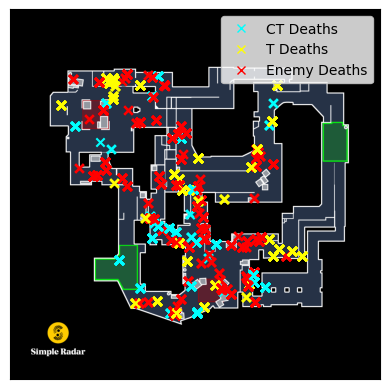

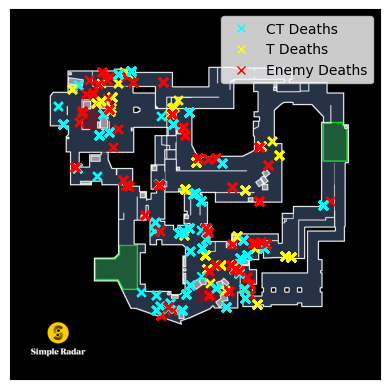

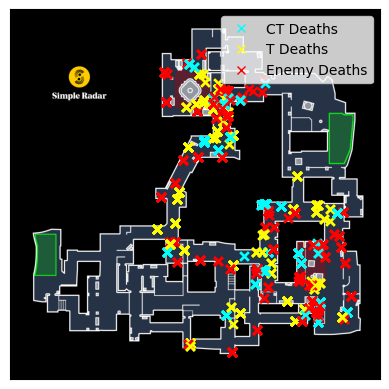

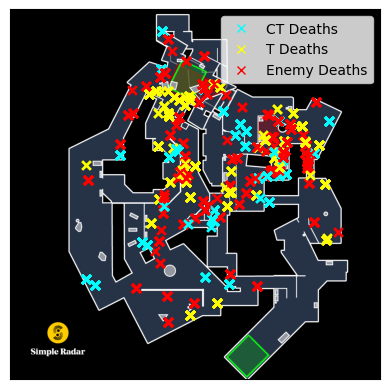

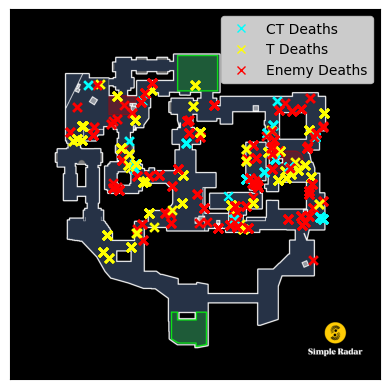

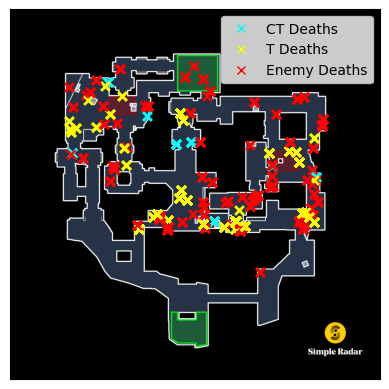

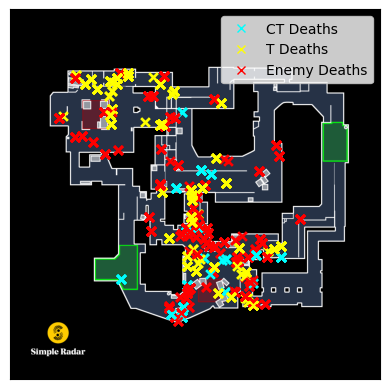

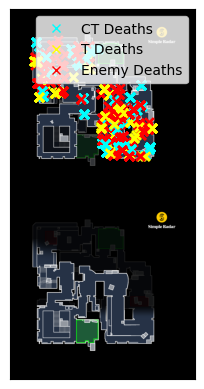

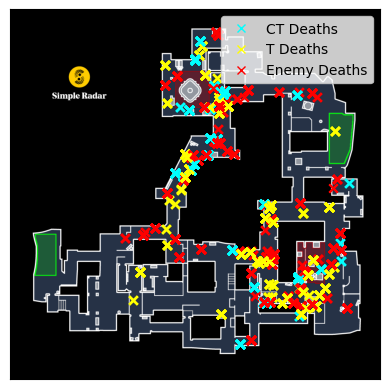

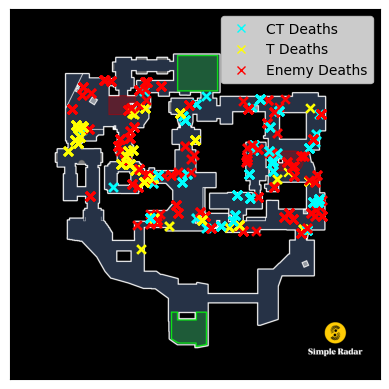

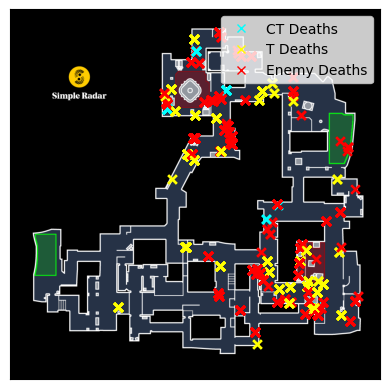

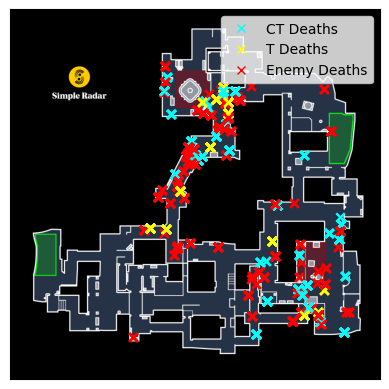

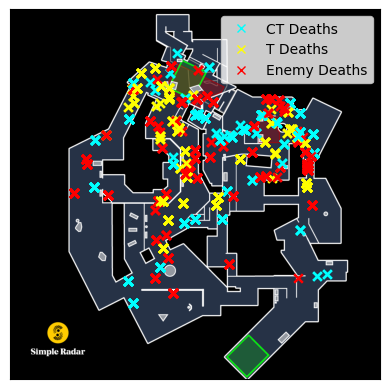

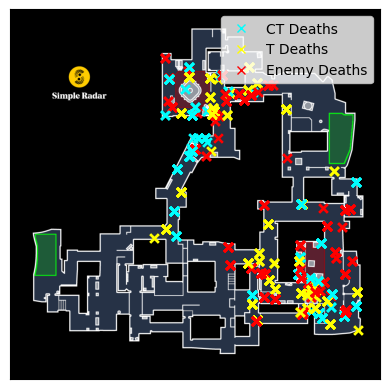

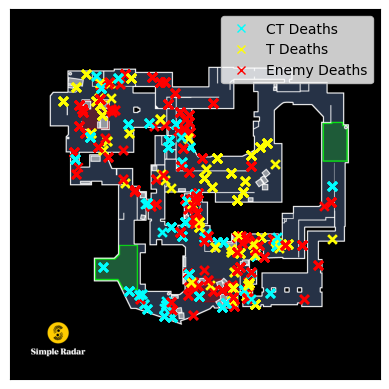

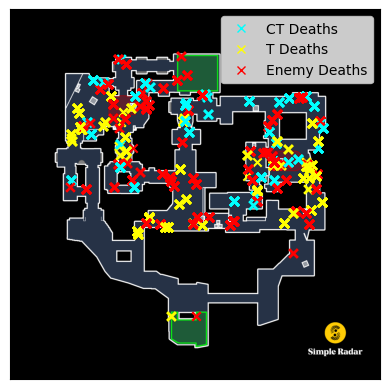

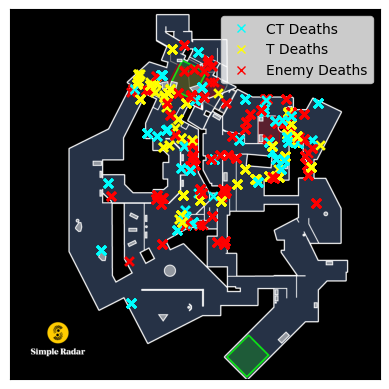

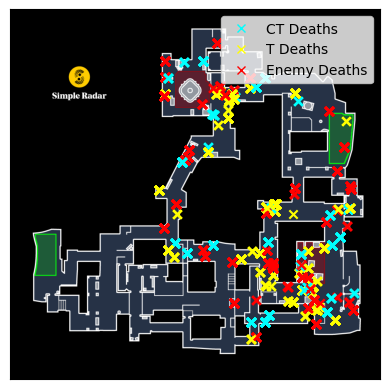

In [6]:
for index, game in enumerate(games):
    plot_game_deaths_overlay_last_frame(game["matchID"] + ".png" ,game["gameRounds"], map_name=game["mapName"], team="MOUZ", map_type="simpleradar")

### Conclusie
De afbeeldingen van de volledige game zijn het meest betrouwbaar aangezien deze meer punten bevatten en dus een duidelijker beeld geven of een bepaalde plek nou echt gevaarlijk/slecht is om met het team naar toe te gaan. Het team zou voordat ze een game gaan spelen een plattegrond van de zelfde map er bij kunnen pakken om kijken welke plekken ze moeten vermijden.

#### Discussie
De meeste plattegronden laten wel zien dat duidelijk op een plek de meeste doden vallen, maar als dit wordt vergeleken met andere plattegronden van dezelfde map valt op dat die plek soms helemaal geen doden vallen. Het lijkt af te hangen van tegen welk team ze spelen en hoe net de game verloopt.

## Heeft de rondelengte invloed op de winkans?
Nadat de files zijn ingeladen, is er gekeken welke onderdelen handig zijn om naar te kijken door de keys op te vragen, zowel van de eerste als de tweede laag. Hieruit bleek dat alleen `gameRounds` genoeg moet zijn om de vraag te kunnen beantwoorden, want deze kan aangeven wanneer een ronde is begonnen en is geëindigd, zoals hieronder is te zien. Een ronde begint pas echt als de `freezeTime` afgelopen is, dus dat wordt gezien als de start van een ronde, dit zorgt er ook voor dat de extra tijd voor het wisselen geen invloed heeft op de tijdsduur van die ronde.

In [ ]:
#verzamelen van de data
data = {}
for game in games:
    i=0
    match = game["matchID"]
    for r in game['gameRounds']:
        start = game['gameRounds'][i]["freezeTimeEndTick"]
        einde = game['gameRounds'][i]["endTick"]
        win = game['gameRounds'][i]["winningTeam"] == "MOUZ"
        data.update({f"{match} - r{i+1}":dict(duur=einde-start, gewonnen=win, ronde=f"r{i+1}")})
        i += 1

#omzetten naar een dataframe om makkelijker te kunnen plotten
df = pd.DataFrame.from_dict(data=data, orient="index")

#data visualiseren
sns.histplot(x=df["duur"], hue=df["gewonnen"], multiple="dodge", hue_order=[True, False], shrink=0.8, 
             palette={True:"green", False:"red"}, kde=True)
plt.show()

### Conclusie
Uit deze analyse volgt dat de rondelengte niet een grote invloed lijkt te hebben of ze wel of niet winnen. Voor de meeste staven maakt het niet zoveel uit of ze wel of niet hebben gewonnen qua duur, deze komen even vaak voor.  Voor sommige staven lijkt het wel uit te maken, maar als je dan kijkt de verdeling over alles (= de lijn) dan lijkt het niet veel uit te maken hoe lang de ronde duurt, ze lopen ongeveer gelijk op. Hieruit kan worden geconcludeerd dat de rondelengte geen invloed heeft op de winkans.

#### Discussie
Over het algemeen doen ze het iets beter over alle tijden heen, maar dit is een bijproduct van de data. Alle data is namelijk geselecteerd zodat MOUZ gewonnen heeft voor een langere periode, waardoor er gemiddeld ook meer gewonnen rondes zijn. Dit moet dan ook in het achterhoofd worden gehouden bij het interpreteren van deze data.   
Daarnaast is dit ook maar voor 1 team (MOUZ), dus is het lastig om te kunnen zeggen of dit geldt voor alle teams.

# Evaluatie
Hier komt de algemene conclusie

### Discussie
Hier komt de algemene discussie